# Лабораторная работа №3
## Лобаева Наталья М19-ТС

### Вариант 9

#### 2 – классификатор K ближайших соседей (задаётся радиус для выбора ближайших объектов)
#### 3 – линейный классификатор (персептрон)

### Цель лабораторной работы – получение навыков работы с методами классификации.

1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)
4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);
7.	Заполните пропущенные значения в данных;
8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 
9.	Сравните кривые для классификаторов, указанных в задании, сделайте выводы.


### Задание 1

1. pclass - класс билета
2. survived - выжившие (0 = нет, 1 = да)
3. name - имя
4. sex - пол
5. age - возраст
6. sibsp - супруги / братья и сестры
7. parch - родителей / детей
8. ticket - номер билет
9. fare - пассажирский тариф
10. cabin - номер кабины
11. embarked - порт погрузки (C = Cherbourg, Q = Queenstown, S = Southampton)
12. boat - лодка
13. body - количество человек
14. home.dest - пути

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
%matplotlib inline

In [2]:
titanic = pd.read_csv('titanic3.csv', sep = ';', comment = '#', decimal=',')

titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


### Задание 2

In [4]:
print("До удаления дубликатов: ", titanic.shape[0])
titanic.drop_duplicates(keep='first',inplace = True)
print("После удаления: ", titanic.shape[0])

До удаления дубликатов:  1310
После удаления:  1310


### Задание 3

<AxesSubplot:xlabel='survived', ylabel='count'>

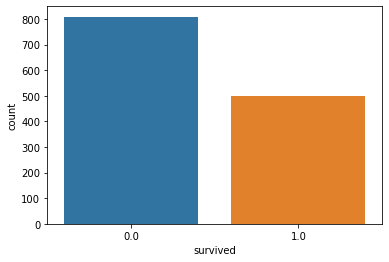

In [5]:
sns.countplot(data = titanic, x='survived')


### Задание 4

In [6]:
titanic = titanic.drop('name', axis=1)
titanic = titanic.drop('ticket', axis=1)
titanic = titanic.drop('body', axis=1)
titanic = titanic.drop('cabin', axis=1)
titanic = titanic.drop('home.dest', axis=1)
titanic = titanic.drop('boat', axis=1)

titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S


Количественные признаки:  ['age', 'sibsp', 'parch', 'fare']
Категориальные признаки:  ['pclass', 'survived', 'sex', 'embarked']


<AxesSubplot:>

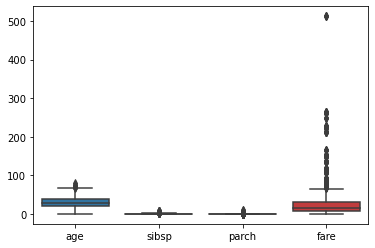

In [7]:
col = titanic.columns
num = [i for i in col if titanic[i].dtype.name != 'object'
                                     and i != 'pclass' and i != 'survived']
categor = [i for i in col if titanic[i].dtype.name == 'object' 
                                      or i == 'pclass' or i == 'survived']
print('Количественные признаки: ', num)
print('Категориальные признаки: ', categor)

sns.boxplot(data = titanic[num])


,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,0.361169,0.000,0.000000,0.412503,S
1,1.0,1.0,male,0.009395,0.125,0.222222,0.295806,S
2,1.0,0.0,female,0.022964,0.125,0.222222,0.295806,S
3,1.0,0.0,male,0.373695,0.125,0.222222,0.295806,S
4,1.0,0.0,female,0.311064,0.125,0.222222,0.295806,S
...,...,...,...,...,...,...,...,...
1305,3.0,0.0,female,NaN,0.125,0.000000,0.028213,C
1306,3.0,0.0,male,0.329854,0.000,0.000000,0.014102,C
1307,3.0,0.0,male,0.336117,0.000,0.000000,0.014102,C
1308,3.0,0.0,male,0.361169,0.000,0.000000,0.015371,S


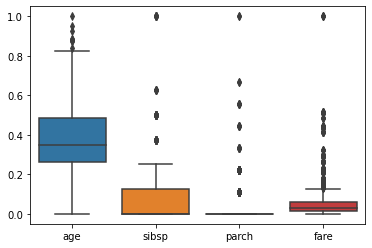

In [8]:
scaler = preprocessing.MinMaxScaler()

titanic[num] = scaler.fit_transform(titanic[num].values.astype(float))
sns.boxplot(data=titanic[num])

titanic

### Задание 5

In [9]:
titanic.at[titanic['sex'] == 'male', 'sex'] = 1
titanic.at[titanic['sex'] == 'female', 'sex'] = 0
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,0,0.361169,0.000,0.000000,0.412503,S
1,1.0,1.0,1,0.009395,0.125,0.222222,0.295806,S
2,1.0,0.0,0,0.022964,0.125,0.222222,0.295806,S
3,1.0,0.0,1,0.373695,0.125,0.222222,0.295806,S
4,1.0,0.0,0,0.311064,0.125,0.222222,0.295806,S


In [10]:
binary = ['survived', 'sex']
nonbinary = ['pclass', 'embarked']
print('Бинарные: ', binary)
print('Небинарные: ', nonbinary)

Бинарные:  ['survived', 'sex']
Небинарные:  ['pclass', 'embarked']


In [11]:
df_nonbinary = pd.get_dummies(titanic[nonbinary])
titanic.drop(nonbinary, axis=1, inplace=True)
titanic = pd.concat([titanic, df_nonbinary], axis=1)

titanic.head()

,survived,sex,age,sibsp,parch,fare,pclass,embarked_C,embarked_Q,embarked_S
0,1.0,0,0.361169,0.000,0.000000,0.412503,1.0,0,0,1
1,1.0,1,0.009395,0.125,0.222222,0.295806,1.0,0,0,1
2,0.0,0,0.022964,0.125,0.222222,0.295806,1.0,0,0,1
3,0.0,1,0.373695,0.125,0.222222,0.295806,1.0,0,0,1
4,0.0,0,0.311064,0.125,0.222222,0.295806,1.0,0,0,1


### Задание 6

,survived,age,sibsp,parch,fare,pclass,embarked_C,embarked_Q,embarked_S
survived,1.000000,-0.055513,-0.027825,0.082660,0.244265,-0.312469,0.182123,-0.016071,-0.154558
age,-0.055513,1.000000,-0.243699,-0.150917,0.178739,-0.408106,0.085777,-0.019458,-0.075971
sibsp,-0.027825,-0.243699,1.000000,0.373587,0.160238,0.060832,-0.048396,-0.048678,0.075198
parch,0.082660,-0.150917,0.373587,1.000000,0.221539,0.018322,-0.008635,-0.100943,0.073258
fare,0.244265,0.178739,0.160238,0.221539,1.000000,-0.558629,0.286269,-0.130059,-0.172683
pclass,-0.312469,-0.408106,0.060832,0.018322,-0.558629,1.000000,-0.269658,0.230491,0.096335
embarked_C,0.182123,0.085777,-0.048396,-0.008635,0.286269,-0.269658,1.000000,-0.164018,-0.774089
embarked_Q,-0.016071,-0.019458,-0.048678,-0.100943,-0.130059,0.230491,-0.164018,1.000000,-0.489049
embarked_S,-0.154558,-0.075971,0.075198,0.073258,-0.172683,0.096335,-0.774089,-0.489049,1.000000


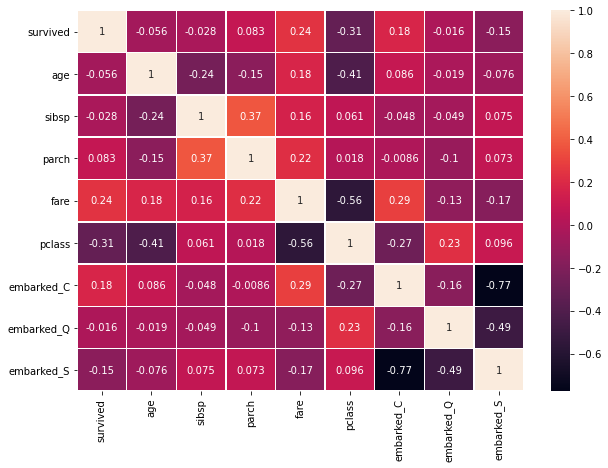

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(titanic.corr(), annot = True, linewidths=.5)
titanic.corr()

### Задание 7

In [13]:
titanic.count()

survived      1309
sex           1309
age           1046
sibsp         1309
parch         1309
fare          1308
pclass        1309
embarked_C    1310
embarked_Q    1310
embarked_S    1310
dtype: int64

In [14]:
titanic = titanic.fillna(titanic.median(axis=0), axis=0)
titanic.count()

survived      1310
sex           1310
age           1310
sibsp         1310
parch         1310
fare          1310
pclass        1310
embarked_C    1310
embarked_Q    1310
embarked_S    1310
dtype: int64

### Задание 8

In [15]:
X, y = titanic.drop(('survived'), axis=1), titanic['survived']
feature_names = X.columns
print(feature_names)

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'pclass', 'embarked_C',
       'embarked_Q', 'embarked_S'],
      dtype='object')


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

### 2 - классификатор (К ближайших соседей по радиусу)

In [17]:
rnc = RadiusNeighborsClassifier()
params = {'radius': [2, 3, 4],
          'weights': ['uniform', 'distance']}

In [18]:
rnc_grid = GridSearchCV(rnc, params)
rnc_grid.fit(X_train, y_train)

GridSearchCV(estimator=RadiusNeighborsClassifier(),
             param_grid={'radius': [2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [19]:
r = rnc_grid.best_estimator_.radius
rnc = RadiusNeighborsClassifier(radius=r)
rnc.fit(X_train, y_train)
y_score = rnc.predict(X_test)
print('Best: %.7f'%(rnc_grid.best_score_))

Best: 0.7710264


### 3 - классификатор (линейный)

In [20]:
ppn = Perceptron()

search = GridSearchCV(estimator=ppn, param_grid={
    'alpha': np.linspace(0, 1, 20)[1:],
    'max_iter': [x for x in range(1, 12)],
}, n_jobs=-1)
search.fit(X_train, y_train)
alpha = search.best_estimator_.alpha
max_iter = search.best_estimator_.max_iter
best = search.best_score_
print('best:', best, 'alpha:', alpha, 'max_iter:', max_iter)

ppn = Perceptron(alpha=alpha, max_iter=max_iter)
ppn.fit(X_train, y_train)
ppn_predict = ppn.predict(X_test)
print('Accuracy ppn: %.5f' % accuracy_score(y_test, ppn_predict))

best: 0.7415835115229271 alpha: 0.05263157894736842 max_iter: 2
Accuracy ppn: 0.78117


C:\Users\Леново\Desktop\piton\WPy64-3880\python-3.8.8.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Леново\Desktop\piton\WPy64-3880\python-3.8.8.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


### Задание 9

In [21]:
y_test_inversion = [1-y for y in y_test]

rnc_proba = rnc.predict_proba(X_test)

cppn = CalibratedClassifierCV(ppn, cv=10)
cppn.fit(X_train, y_train)
ppn_proba = cppn.predict_proba(X_test)

C:\Users\Леново\Desktop\piton\WPy64-3880\python-3.8.8.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Леново\Desktop\piton\WPy64-3880\python-3.8.8.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Леново\Desktop\piton\WPy64-3880\python-3.8.8.amd64\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\Леново\Desktop\piton\WPy64-3880\python-3.8.8.a

### PR - кривые

In [22]:
def Pr(prob, occupancy, label, test):
    precision, recall, _ = precision_recall_curve(test, prob[:, occupancy])
    aps = average_precision_score(test, prob[:, occupancy])
    plt.plot(recall, precision, label='%s PR (area = %f)' % (label, aps))

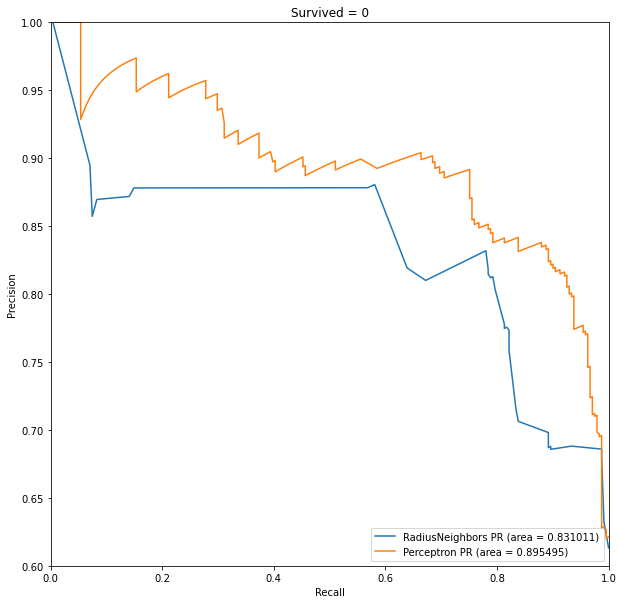

In [23]:
plt.figure(figsize=(10,10))

Pr(rnc_proba, 0, 'RadiusNeighbors', y_test_inversion)
Pr(ppn_proba, 0, 'Perceptron', y_test_inversion)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.6, 1.0])
plt.title('Survived = 0')
plt.legend(loc=4, fontsize='medium')
plt.show()

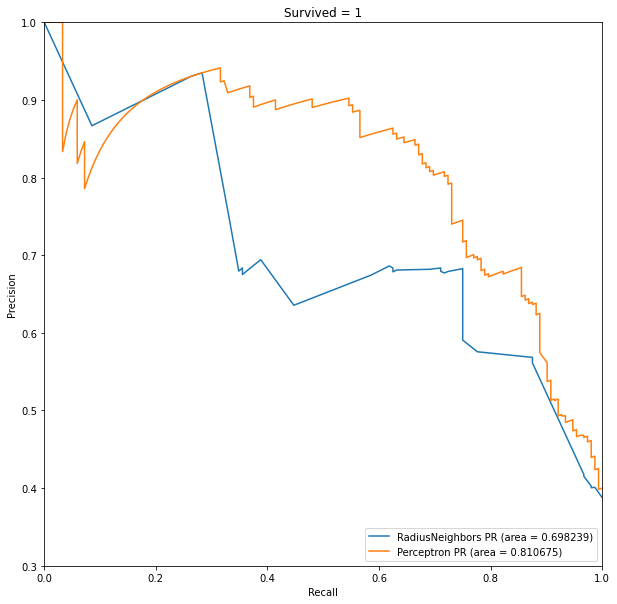

In [24]:
plt.figure(figsize=(10,10))

Pr(rnc_proba, 1, 'RadiusNeighbors', y_test)
Pr(ppn_proba, 1, 'Perceptron', y_test)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.3, 1.0])
plt.title('Survived = 1')
plt.legend(loc=4, fontsize='medium')
plt.show()

### ROC - кривые

In [25]:
def Roc0(prob, label, test):
    tpr, fpr, _ = roc_curve(test, prob[:, 0])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc)) 

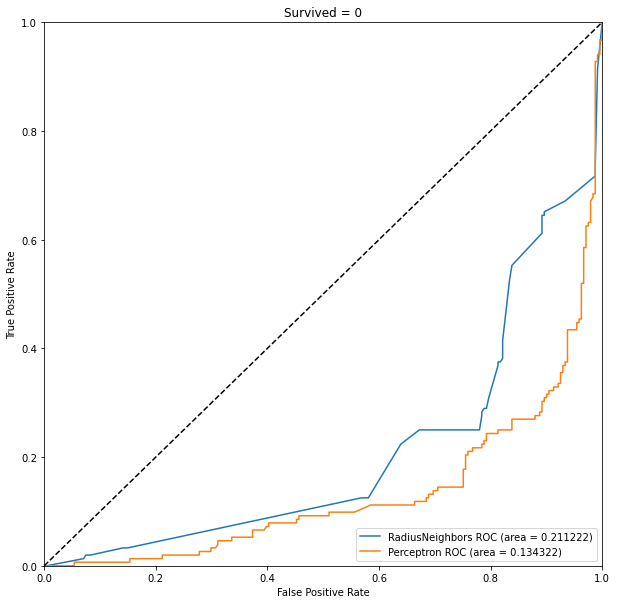

In [26]:
plt.figure(figsize=(10,10))

Roc0(rnc_proba, 'RadiusNeighbors', y_test_inversion)
Roc0(ppn_proba, 'Perceptron', y_test_inversion)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Survived = 0')
plt.show()

In [27]:
def Roc1(prob, label, test):
    fpr, tpr, _ = roc_curve(test, prob[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %f)' % (label, roc_auc))

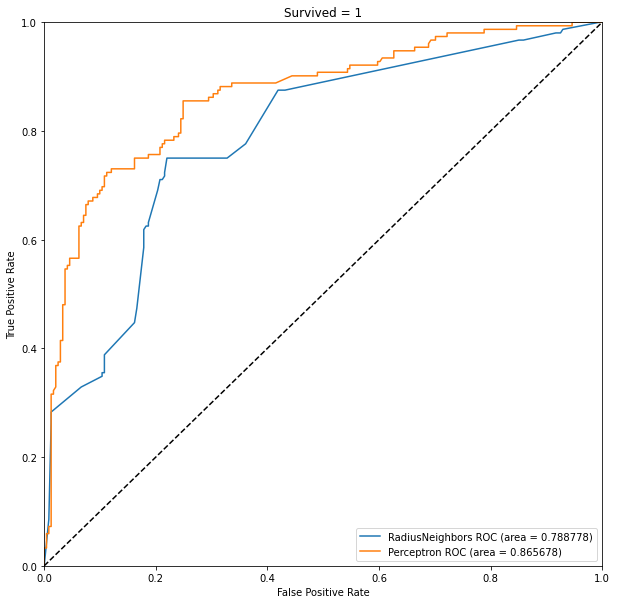

In [28]:
plt.figure(figsize=(10,10))

Roc1(rnc_proba, 'RadiusNeighbors', y_test)
Roc1(ppn_proba, 'Perceptron', y_test)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4, fontsize='medium')
plt.title('Survived = 1')
plt.show()

---

#### Линейный классификатор оптимальнее 